# FACULTAD DE CIENCIAS - CIENCIA DE LA COMPUTACION
---
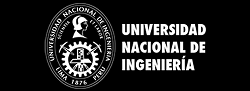

---


# TEMA: Fourie Expasion, Fourier Transformation(FT), Discret Fourier Transform(DFT) and Fast Fourier Transform Algorithm(FFT)

---

# Expansión en Series de Fourier

La expansión en Series de Fourier permite representar cualquier función periódica con una suma infinita de funciones sinusoidales. Estas funciones están compuestas por un armónico principal que oscila a la frecuencia fundamental e infinitos armónicos que oscilan con frecuencias que son multiplos enteros de la frecuencia fundamental

#Ejemplo1
Se hace la serie de Fourier para la funcion $f(x)=x$ en forma algebraica, en el dominio $D=[0,2\pi]$ y con periodo $T=2\pi$

In [13]:
#[1] DEFINICIONES DE LIBRERIAS Y PARAMETROS INICIALES DE LA SERIE FOURIER

from IPython.display import Image
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import scipy as sp
import sympy as sym

%matplotlib inline

#Declaramos las variables simbólicas n y t
n = sym.Symbol('n')
t = sym.Symbol('t')

#Definimos la función peridódica
Tmin = 0
Tmax = 2*np.pi

T=Tmax-Tmin
#definicion de la frecuencia natural
w = 2*np.pi/T

#definicion de la funcion al que se hara la expasion de fourier
function=t

In [14]:
#[2] CALCULO DE COEFICIENTES ALGREBRAICOS DE LA SERIE DE FOURIER

# Calculamos la integral para a0
f_integral = function
a0 = (2/T)*sym.integrate(f_integral,(t,Tmin,Tmax))
print("a0 = ")
sym.pprint(a0)

# Calculamos la integral para an
f_integral = function*sym.cos(n*w*t)
an = (2/T)*sym.integrate(f_integral,(t,Tmin,Tmax))
an = sym.simplify(an)
print("an = ")
sym.pprint(an)

# Calculamos la integral para bn
f_integral = function*sym.sin(n*w*t)
bn = (2/T)*sym.integrate(f_integral,(t,Tmin,Tmax))
print("bn = ")
bn = sym.simplify(bn)
sym.pprint(bn)


a0 = 
6.28318530717959
an = 
⎧2.0⋅n⋅sin(6.28318530717959⋅n) + 0.318309886183791⋅cos(6.28318530717959⋅n) - 0 ↪
⎪───────────────────────────────────────────────────────────────────────────── ↪
⎪                                              2                               ↪
⎨                                             n                                ↪
⎪                                                                              ↪
⎪                                      6.28318530717959                        ↪
⎩                                                                              ↪

↪ .318309886183791                                                             ↪
↪ ────────────────  for (n > -∞ ∨ n > 0) ∧ (n > -∞ ∨ n < ∞) ∧ (n > 0 ∨ n < 0)  ↪
↪                                                                              ↪
↪                                                                              ↪
↪                                                                              

f(t)= 
-2.0⋅sin(1.0⋅t) - 1.0⋅sin(2.0⋅t) - 0.666666666666667⋅sin(3.0⋅t) - 0.5⋅sin(4.0⋅ ↪

↪ t) - 0.4⋅sin(5.0⋅t) - 0.333333333333333⋅sin(6.0⋅t) - 0.285714285714286⋅sin(7 ↪

↪ .0⋅t) - 0.25⋅sin(8.0⋅t) - 0.222222222222222⋅sin(9.0⋅t) - 0.2⋅sin(10.0⋅t) - 0 ↪

↪ .181818181818182⋅sin(11.0⋅t) - 0.166666666666667⋅sin(12.0⋅t) - 0.15384615384 ↪

↪ 6154⋅sin(13.0⋅t) - 0.142857142857143⋅sin(14.0⋅t) - 0.133333333333333⋅sin(15. ↪

↪ 0⋅t) - 0.125⋅sin(16.0⋅t) - 0.117647058823529⋅sin(17.0⋅t) - 0.111111111111111 ↪

↪ ⋅sin(18.0⋅t) - 0.105263157894737⋅sin(19.0⋅t) - 0.1⋅sin(20.0⋅t) - 0.095238095 ↪

↪ 2380952⋅sin(21.0⋅t) - 0.0909090909090909⋅sin(22.0⋅t) - 0.0869565217391304⋅si ↪

↪ n(23.0⋅t) - 0.0833333333333333⋅sin(24.0⋅t) - 0.08⋅sin(25.0⋅t) - 0.0769230769 ↪

↪ 230769⋅sin(26.0⋅t) - 0.0740740740740741⋅sin(27.0⋅t) - 0.0714285714285714⋅sin ↪

↪ (28.0⋅t) - 0.0689655172413793⋅sin(29.0⋅t) - 0.0666666666666667⋅sin(30.0⋅t) - ↪

↪  0.0645161290322581⋅sin(31.0⋅t) - 0.0625⋅sin(32.0⋅t) - 0.0606060606060606⋅si ↪

↪ n(33.0⋅

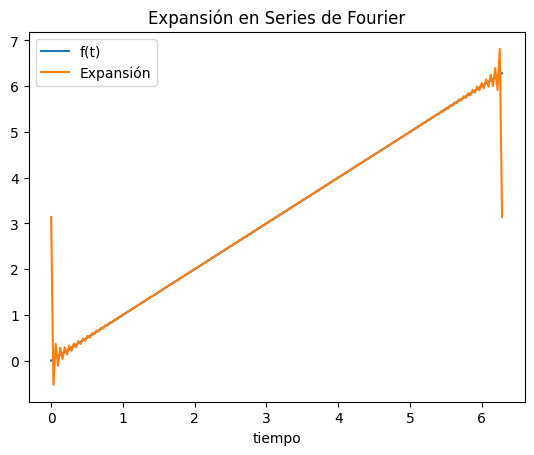

In [15]:
#[3] USANDO LOS COEFICIENTES ALGREBRAICOS, PARA ESCRIBIR DE LA SERIE DE FOURIER

#suma inicial de la serie
serie = 0
# definimos el número de armónicos para la expansión
Armonicos = 100

for i in range(1,Armonicos+1):

    # Evaluamos los coeficientes para cada armónico
    an_c = an.subs(n,i)
    bn_c = bn.subs(n,i)
    #if abs(an_c) < 0.0001: an_c = 0 #para no tomar en concideracion en la suma
    #if abs(bn_c) < 0.0001: bn_c = 0 #para no tomar en concideracion en la suma

    serie= serie + an_c*sym.cos(i*w*t) # Términos coseno de la serie
    serie = serie + bn_c*sym.sin(i*w*t) # Términos seno de la serie

serie = a0/2+serie  # Expansión final de la serie

#impresion de la expansion completa
print('f(t)= ')
sym.pprint(serie)

# Convertimos la expresión Sympy a una función evaluable
fserie = sym.lambdify(t,serie)
f = sym.lambdify(t,function)

# Creamos un vector de tiempo para la gráfica
v_tiempo = np.linspace(Tmin,Tmax,200)

# Evaluamos las funciones
fserieG = fserie(v_tiempo)
fG = f(v_tiempo)

plt.plot(v_tiempo,fG,label = 'f(t)')
plt.plot(v_tiempo,fserieG,label = 'Expansión')

plt.xlabel('tiempo')
plt.legend()
plt.title('Expansión en Series de Fourier')
plt.show()

#Transformada de Fourier(FT)

Sea $f(t) \in R$
$$\mathcal{F}\{f(t)\} = F(\omega) = \int_{-\infty}^{\infty} f(t) e^{-i 2\pi \omega t} \, dt $$




#Transformada de Discrtea de Fourier

Definimos la tranformada discreta de Fourier como:

$$F[w] = \sum_{n=0}^{N-1} f(n) e^{-i \frac{2\pi}{N} w \; n}$$

In [17]:
import numpy as np
#transfomada discreta de fourier(DFT)
def discrete_fourier_transform(data):
  """
  data: np.array,de 1 dimension
  return: Transformad de Fourier
  """
  #longitud de la data
  N=data.shape[0]
  #crea un array [0, 1, 2, 3,...,N-1]
  n=np.arange(N)
  # Convierte en una columna el array n
  k=n.reshape((N,1))

  M=np.exp(-1j*2*np.pi*k*n/N)

  return np.dot(M,data)

**EJEMPLO**

Calculamos primero la transformada discreta de fourier para una data $f[n]=[0, 1, 2, 3, 4]$, luego para una data $f[n]=0:19500$

In [18]:
#ejemplo transformada discreta
import time

start_time = time.time()  # Captura el tiempo de inicio

# Señal de entrada 1
data = np.array([0, 1, 2, 3, 4])

# Señal de entrada 2
#data=np.arange(8500)

#impresion de la data
print("Generacion de la Data: ",data)

# Calcula la DFT
dft_result = discrete_fourier_transform(data)
print("##########     DISCRETE FOURIER TRANSFORM     ##########")
print("\nSeñal original:", data)
print("\nTransformada Discreta de Fourier:", dft_result)
end_time = time.time()  # Captura el tiempo de finalización


execution_time = end_time - start_time  # Tiempo total en segundos
print(f"\nEl tiempo de ejecución del programa implementado fue: {execution_time:.6f} segundos")


start_time = time.time()  # Captura el tiempo de inicio
print("\nTransformada Discreta de Fourier con libreria:", np.fft.fft(data))
end_time = time.time()  # Captura el tiempo de finalización
execution_time = end_time - start_time  # Tiempo total en segundos
print(f"\nEl tiempo de ejecución del programa con librerias fue: {execution_time:.6f} segundos")



Generacion de la Data:  [0 1 2 3 4]
##########     DISCRETE FOURIER TRANSFORM     ##########

Señal original: [0 1 2 3 4]

Transformada Discreta de Fourier: [10. +0.j         -2.5+3.4409548j  -2.5+0.81229924j -2.5-0.81229924j
 -2.5-3.4409548j ]

El tiempo de ejecución del programa implementado fue: 0.001134 segundos

Transformada Discreta de Fourier con libreria: [10. +0.j         -2.5+3.4409548j  -2.5+0.81229924j -2.5-0.81229924j
 -2.5-3.4409548j ]

El tiempo de ejecución del programa con librerias fue: 0.000329 segundos


#Algortimo de transformada Rapida de  Fourier(FFT)

Definimos la tranformada discreta de Fourier como:

$$F[w] = \sum_{n=0}^{N-1} f(n) e^{-i \frac{2\pi}{N} w \; n}$$

In [19]:
import numpy as np
#funcion que genera los datos aleatoriamente
def get_data(len):
  """
  len: longitud de los datos requeridos, numero entero
  """
  data=np.random.rand(len)
  return data

def get_circular_terms(N):
  """
  N: numero entero
  """
  terms=np.exp(-1j*2*np.pi*np.arange(N)/N)
  return terms

#transfomada rapida de fourier(FFT)
def fast_fourier_transform(data):
  """
  data: np.array,de 1 dimension
  return: Transformada de Fourier
  """
  #longitud de los datos
  N=data.shape[0]

  assert N % 2==0,'longitud de los datos: {} debe ser una potencia de 2'.format(N)

  if N<=2:
    return discrete_fourier_transform(data)

  else:
    data_even=fast_fourier_transform(data[::2])
    data_odd=fast_fourier_transform(data[1::2])
    terms=get_circular_terms(N)

    return np.concatenate(
        [data_even+terms[:N//2]*data_odd,
        data_even+terms[N//2:]*data_odd
        ]
    )


In [20]:
#numero de elementos de los datos
N=8
#generacion de la data
X=get_data(4)
print("Generacion de la Data: ",X)

X=np.arange(4)
print("Generacion de la Data: ",X)

print("\nELementos circulares: ",get_circular_terms(2))

dft=discrete_fourier_transform(X)
fft=fast_fourier_transform(X)
fft_np=np.fft.fft(X)

print("\nDFT: ",dft)
print("\nFFT: ",fft)
print("\nFFT con numpy: ",fft_np)

print(np.allclose(dft,fft_np),
      np.allclose(fft,fft_np))

print("")
#show_M(N)

Generacion de la Data:  [0.92885807 0.95429488 0.24404674 0.19377076]
Generacion de la Data:  [0 1 2 3]

ELementos circulares:  [ 1.-0.0000000e+00j -1.-1.2246468e-16j]

DFT:  [ 6.+0.00000000e+00j -2.+2.00000000e+00j -2.-7.34788079e-16j
 -2.-2.00000000e+00j]

FFT:  [ 6.+0.0000000e+00j -2.+2.0000000e+00j -2.-4.8985872e-16j
 -2.-2.0000000e+00j]

FFT con numpy:  [ 6.+0.j -2.+2.j -2.+0.j -2.-2.j]
True True



**EJEMPLO**

Generacion de de una señala artificial con tres frescuencias, la primera de 60Hz,la segunda de 160Hz y la ultima con 250Hz, con amplitudes 3, 0.5 y 2.3,  luego se usara FFT para la ver las frecuencias predominantes.

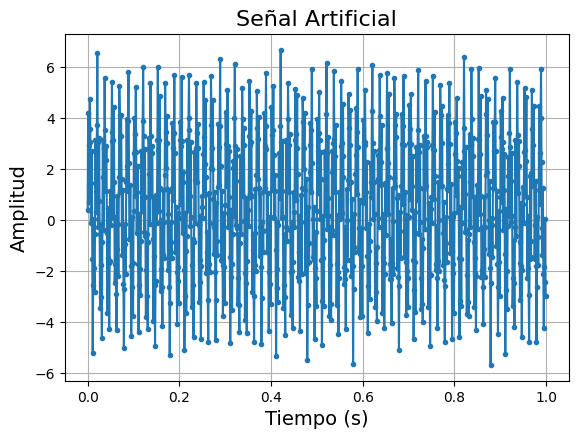

In [25]:
import numpy as np
import matplotlib.pyplot as plt

#Generacion de Señal artificial
Ts=0.001  # perido
Fs=1/Ts   # frecuencia
w1=2*np.pi*60  #frecuencia de 60Hz para la señal 1
w2=2*np.pi*160 #frecuencia de 160Hz para la señal 2
w3=2*np.pi*250 #frecuencia de 250Hz para la señal 3

#constrruccion de la señal compuesta con w1,w2,w3 y ruido
n=Ts*np.arange(0,1000) #numero
ruido=np.random.random(len(n)) #generacion del ruido arbitrario
x=3*np.sin(w1*n)+0.5*np.sin(w2*n)+2.3*np.sin(w3*n)+ruido


# Ajustar tamaño de la figura
plt.figure(figsize=(6.5, 4.5)) # ancho=12, alto=6 (ajústalo según lo que necesites)
plt.plot(n, x, '.-') # construye el objeto de ploteo de la señal
plt.xlabel('Tiempo (s)', fontsize=14) # configuración del eje x
plt.ylabel('Amplitud', fontsize=14)  # configuración del eje y
plt.title('Señal Artificial', fontsize=16) # título del gráfico
plt.grid(True) # agregar cuadrícula para mejor visualización
plt.show() # muestra el ploteo


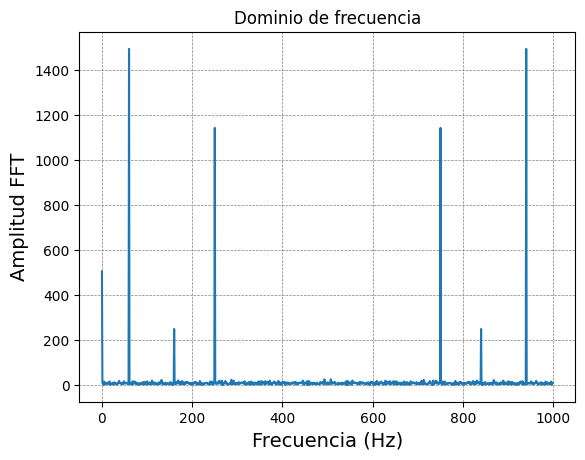

In [26]:
#Usando la transformada discreta de Fourier (FFT)
gk= np.fft.fft(x)
#print(gk) #impresion resultado de FFT
M_gk=abs(gk)
F=Fs*np.arange(0,len(x))/len(x)

#VENTANA ESTATICA
plt.plot(F,M_gk)
plt.title("Dominio de frecuencia")
plt.xlabel('Frecuencia (Hz)',fontsize='14')
plt.ylabel('Amplitud FFT',fontsize='14')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show() #muestra el ploteo

print("\n")

#VENTANA DINAMICA
import plotly.graph_objects as go
# Crear gráfico interactivo con plotly
fig = go.Figure()

# Añadir la traza al gráfico
fig.add_trace(go.Scatter(x=F, y=M_gk, mode='lines', name='FFT'))

# Configuración del diseño del gráfico
fig.update_layout(
    title=dict(
        text='Dominio de frecuencia',  # Texto del título
        x=0.5,  # Centra el título (0: izquierda, 1: derecha)
        y=0.95,  # Ajusta la posición vertical
        font=dict(size=20, family='Arial, sans-serif')  # Tamaño y fuente
    ),
    xaxis=dict(
        title=dict(
        text='Frecuencia (Hz)',
        font=dict(size=14)  # Tamaño de la fuente del título del eje X
        ),
        showgrid=True,  # Activa la grilla en el eje X
        gridcolor='lightgray',  # Color de la grilla
        gridwidth=1,  # Ancho de la línea de la grilla
        showline=True,  # Muestra la línea del borde en el eje X
        linecolor='black',  # Color del borde
        linewidth=0.1,  # Grosor del borde 
    ),
    yaxis=dict(
        title=dict(
        text='Amplitud FFT',
        font=dict(size=14)  # Tamaño de la fuente del título del eje Y
        ),
        showgrid=True,  # Activa la grilla en el eje Y
        gridcolor='lightgray',  # Color de la grilla
        gridwidth=1,  # Ancho de la línea de la grilla
        showline=True,  # Muestra la línea del borde en el eje Y
        linecolor='black',  # Color del borde
        linewidth=0.1,  # Grosor del borde
    ),
    template='plotly_white',  # Fondo blanco
    margin=dict(l=50, r=50, t=80, b=50),  # Márgenes del gráfico
    width=600,  # Ancho del gráfico en píxeles
    height=400,  # Altura del gráfico en píxeles
    legend=dict(
        x=0.8, y=1,  # Posición de la leyenda
        bgcolor='rgba(255,255,255,0.8)',  # Fondo semitransparente
        bordercolor='black',  # Color del borde de la leyenda
        borderwidth=1  # Ancho del borde
    )
)
# Mostrar el gráfico
#import plotly.io as pio   
#pio.renderers.default = 'browser'
fig.show()